In [1]:
import pandas as pd
import joblib
import pickle
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import json
import os

In [2]:
import tensorflow as tf
from sklearn.compose import ColumnTransformer
import sklearn

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [4]:
svr = joblib.load('D:\\github\\apartment-price-prediction\\model\\models\\SVR.pkl')
lr = joblib.load('D:\\github\\apartment-price-prediction\\model\\models\\LinearRegression.pkl')
xg = joblib.load('D:\\github\\apartment-price-prediction\\model\\models\\XGBoost.pkl')

In [5]:
X_train = pd.read_csv('D:\\github\\apartment-price-prediction\\data\\finalized\\X_train.csv')
y_train = pd.read_csv('D:\\github\\apartment-price-prediction\\data\\finalized\\y_train.csv').values.ravel()

In [6]:
preprocessor = joblib.load('D:\\github\\apartment-price-prediction\\model\\feature_engineering\\preprocessor.pkl')
X_train_transformed = preprocessor.fit_transform(X_train)

In [7]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.4.2.


In [8]:
xg.fit(X_train_transformed, y_train)

feature_importances = xg.feature_importances_
#feature_names = X_train_transformed.columns

In [10]:
for i, value in enumerate(feature_importances):
    print(f"Feature {i}: {value}")

Feature 0: 0.004210243932902813
Feature 1: 0.000784852250944823
Feature 2: 0.003063677344471216
Feature 3: 0.000895004253834486
Feature 4: 0.0004645761218853295
Feature 5: 0.004925320390611887
Feature 6: 0.00764667522162199
Feature 7: 0.000274178251856938
Feature 8: 0.0010983537649735808
Feature 9: 0.009258145466446877
Feature 10: 0.0022578658536076546
Feature 11: 0.0049256738275289536
Feature 12: 0.001583051634952426
Feature 13: 0.005861341487616301
Feature 14: 0.013482616282999516
Feature 15: 0.018515581265091896
Feature 16: 0.00786569807678461
Feature 17: 0.0011435921769589186
Feature 18: 0.014575677923858166
Feature 19: 0.044236864894628525
Feature 20: 0.01185964047908783
Feature 21: 0.010347339324653149
Feature 22: 0.013582147657871246
Feature 23: 0.01129868533462286
Feature 24: 0.009651275351643562
Feature 25: 0.0011097058886662126
Feature 26: 0.0011872055474668741
Feature 27: 0.0007028394611552358
Feature 28: 0.00016504466475453228
Feature 29: 0.00028057050076313317
Feature 30: 

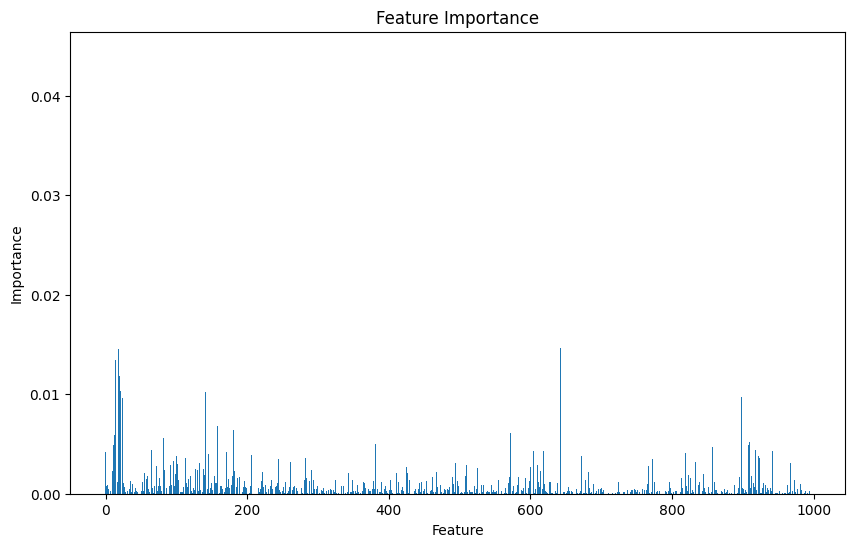

In [13]:
feature_importances = pd.DataFrame({
    'Feature': range(X_train_transformed.shape[1]),
    'Importance': xg.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

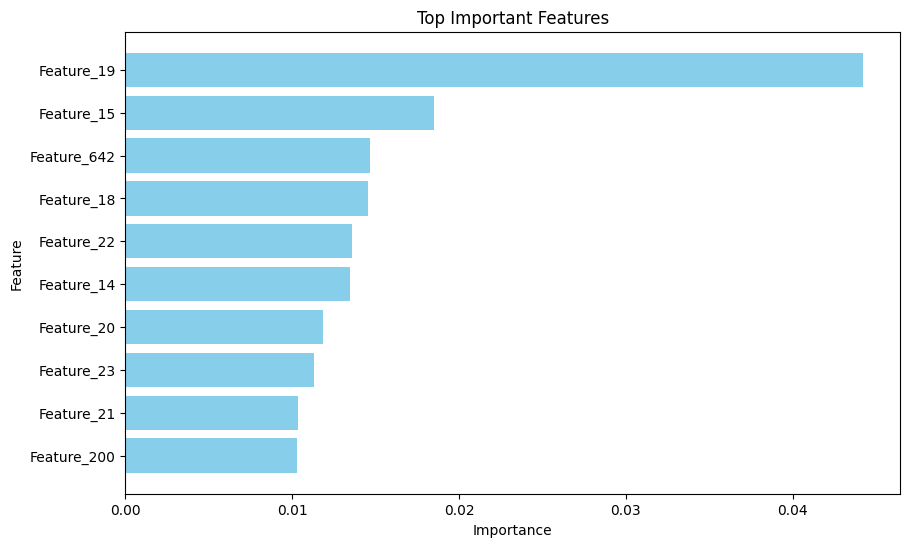

In [15]:
importances = xg.feature_importances_

# Map to feature names if X_train is a DataFrame
if isinstance(X_train_transformed, pd.DataFrame):
    feature_names = X_train_transformed.columns
else:
    feature_names = [f'Feature_{i}' for i in range(X_train_transformed.shape[1])]

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [12]:
lr.fit(X_train_transformed, y_train)
feature_importances = lr.coef_

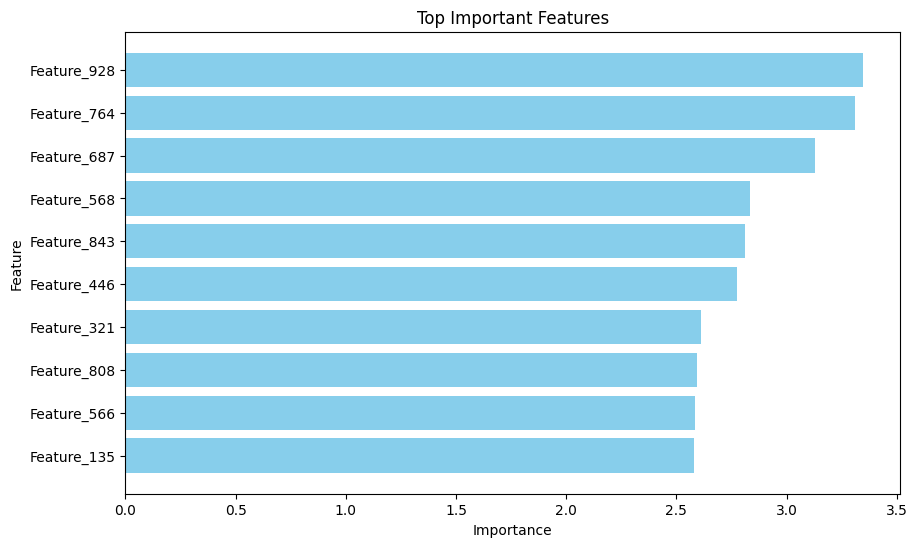

In [16]:
importances = lr.coef_

# Map to feature names if X_train is a DataFrame
if isinstance(X_train_transformed, pd.DataFrame):
    feature_names = X_train_transformed.columns
else:
    feature_names = [f'Feature_{i}' for i in range(X_train_transformed.shape[1])]

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [22]:
svr.fit(X_train_transformed, y_train)

SVR(C=10, gamma=0.1)

In [21]:
feature = svr.dual_coef_
print(feature)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10259 stored elements and shape (1, 10259)>
  Coords	Values
  (0, 0)	10.0
  (0, 1)	-7.136658700059993
  (0, 2)	5.4491967066227245
  (0, 3)	10.0
  (0, 4)	-0.6668161966292416
  (0, 5)	10.0
  (0, 6)	10.0
  (0, 7)	10.0
  (0, 8)	10.0
  (0, 9)	7.538768440277012
  (0, 10)	-10.0
  (0, 11)	10.0
  (0, 12)	10.0
  (0, 13)	-1.4082589476058596
  (0, 14)	2.278509270058097
  (0, 15)	8.799144790586029
  (0, 16)	10.0
  (0, 17)	-10.0
  (0, 18)	-10.0
  (0, 19)	10.0
  (0, 20)	10.0
  (0, 21)	2.0223244332426407
  (0, 22)	2.81313868396799
  (0, 23)	10.0
  (0, 24)	10.0
  :	:
  (0, 10234)	4.116352830026234
  (0, 10235)	7.16620824251759
  (0, 10236)	-10.0
  (0, 10237)	-10.0
  (0, 10238)	10.0
  (0, 10239)	-10.0
  (0, 10240)	-4.696206778226979
  (0, 10241)	-10.0
  (0, 10242)	8.768381824201594
  (0, 10243)	10.0
  (0, 10244)	10.0
  (0, 10245)	-2.427112385614585
  (0, 10246)	10.0
  (0, 10247)	10.0
  (0, 10248)	10.0
  (0, 10249)	-10.0
  (0, 10250)	-6.625214